<div class="big_title">LAB 4: Plotting and basic data exploration</div>

BIO3782: Biologist's Toolkit (Dalhousie University)

----------------------------------------

# Setup of workspace

<span class="important"></span> Make sure all required files are in the working directory:

* Create a **folder** on the "Desktop" and name it <span class='file'>Lab4</span>
* From Brightspace, download the following files into your new folder <span class='file'>Desktop\Lab4</span>:
   * <span class='file'>surveys_clean.csv</span>
   
* In RStudio, change the "working directory" to: <span class='file'>Desktop\Lab4</span>. Click here if you need a [refresher on the **working directory**](https://diego-ibarra.github.io/biol3782/week1/index.html#RStudio's-%22Working-Directory%22)

----------------------------------


In this lab we will do the initial exploration of a dataset of animal species diversity and weights. The initial exploration involves:

1. basic data exploration, and
2. plotting the data

# Basic data exploration

When you first get a dataset, there are some basic steps that should do before actively engaging in proper data analysis. These steps are:

* **Load the data**
    * Can R read-in your data file?
* **View the data**
    * What is in your data file?
    * What are the headers of columns? 
    * What are the units?
    * What is the quality of the data? ...are there lots of missing values and NaN?
* **Calculate basic descriptive statistics of the data**
    * For each column, what are the mean, median, standard deviation, max, min, etc.
* **Do exploratory plots**
    * What does the data look like? - We'll dive in this in the next section

--------------

There are many R functions designed to help you explore and understand your data. Some of the most commonly used are:

* Size:
    * `dim()` - returns a vector with the number of rows in the first element, and the number of columns as the second element (the dimensions of the object)
    * `nrow()` - returns the number of rows
    * `ncol()` - returns the number of columns
* Content:
    * `head()` - shows the first 6 rows
    * `tail()` - shows the last 6 rows
* Names:
    * `names()` - returns the column names (synonym of colnames() for data.frame objects)
    * `rownames()` - returns the row names
* Summary:
    * `str()` - structure of the object and information about the class, length and content of each column
    * `summary()` - summary statistics for each column

## Reading the data into R

To get R to load the data from the file into memory we use the `read.csv` function.

<br><br><br>
<div class="startTASK"></div>

First, make sure you have the data file <span class="file">surveys_complete.csv</span> in your working directory.

Then, type the following in RStudio's <span class="console"></span> and click [enter]:

In [102]:
surveys <- read.csv("surveys_clean.csv")

<div class="endTASK"></div>
<br><br><br>

## View data contents


### Head and tail functions

The easiest and fastest way to take a peek at your data is with the `head()` and `tail()` function. 

`head()` returns the **first** few rows of the data frame or vector.

`tail()` returns the **last** few rows of the data frame or vector.

Lets try `head()` first:

In [111]:
head(surveys)

record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,genus,species,taxa,plot_type
845,5,6,1978,2,NL,M,32,204,Neotoma,albigula,Rodent,Control
1164,8,5,1978,2,NL,M,34,199,Neotoma,albigula,Rodent,Control
1261,9,4,1978,2,NL,M,32,197,Neotoma,albigula,Rodent,Control
1756,4,29,1979,2,NL,M,33,166,Neotoma,albigula,Rodent,Control
1818,5,30,1979,2,NL,M,32,184,Neotoma,albigula,Rodent,Control
1882,7,4,1979,2,NL,M,32,206,Neotoma,albigula,Rodent,Control



<br><br><br>
<div class="startTASK"></div>

Use the `tail()` function to take a look the last few rows of your data.



<div class="endTASK"></div>
<br><br><br>

<div class="Q"><br>

What is the last <b>record_id</b> of the data?

<span class="codeerror">Correct: 35382</span>

<br><br><div class="qhelp"></div></div>

### RStudio's spreadsheet-style data viewer

Another way to take a look at your data is by displaying it in RStudio. You can do that by:

1. Using the `view()` function (e.g. type `view(surveys)` on RStudio's <span class="console"></span> and click [enter])
2. Go to the Environment Panel and double click on the variable you want to view (e.g. `surveys`)

<br><br><br>
<div class="startTASK"></div>

Using either of the two methods above, take a look at `surveys` data in RStudio's spreadsheet-style data viewer. 

<div class="endTASK"></div>
<br><br><br>

<div class="Q"><br>

What is the <b>record_id</b> of the 20th data row?

<span class="codeerror">Correct: 6020</span>

<br><br><div class="qhelp"></div></div>

## Explore data size and structure

You can use the function `names()` to take a look at the column "headers". 

In [9]:
names(surveys)

[1] "record_id"       "month"           "day"             "year"           
 [5] "plot_id"         "species_id"      "sex"             "hindfoot_length"
 [9] "weight"          "genus"           "species"         "taxa"           
[13] "plot_type"

Note that `names()` returns a `vector` of `character` elements:

In [162]:
class(names(surveys))

[1] "character"

The function `str()` compactly display the internal **str**ucture of an R object.

In [22]:
str(surveys)

'data.frame':	34786 obs. of  13 variables:
 $ record_id      : int  1 72 224 266 349 363 435 506 588 661 ...
 $ month          : int  7 8 9 10 11 11 12 1 2 3 ...
 $ day            : int  16 19 13 16 12 12 10 8 18 11 ...
 $ year           : int  1977 1977 1977 1977 1977 1977 1977 1978 1978 1978 ...
 $ plot_id        : int  2 2 2 2 2 2 2 2 2 2 ...
 $ species_id     : Factor w/ 48 levels "AB","AH","AS",..: 16 16 16 16 16 16 16 16 16 16 ...
 $ sex            : Factor w/ 3 levels "","F","M": 3 3 1 1 1 1 1 1 3 1 ...
 $ hindfoot_length: int  32 31 NA NA NA NA NA NA NA NA ...
 $ weight         : int  NA NA NA NA NA NA NA NA 218 NA ...
 $ genus          : Factor w/ 26 levels "Ammodramus","Ammospermophilus",..: 13 13 13 13 13 13 13 13 13 13 ...
 $ species        : Factor w/ 40 levels "albigula","audubonii",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ taxa           : Factor w/ 4 levels "Bird","Rabbit",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ plot_type      : Factor w/ 5 levels "Control","Long-term Krat Exclosure",..: 1

The function `dim()` returns both, the number of rows and columns:

In [23]:
dim(surveys)

[1] 34786    13

The function `nrow()` returns only the number of rows:

In [24]:
nrow(surveys)

[1] 34786

The function `ncol()` returns only the number of columns:

<br><br><br>
<div class="startTASK"></div>

Use the `ncol()` function to figure out how many columns are in your data.

<div class="endTASK"></div>
<br><br><br>

<div class="Q"><br>

How many columns are in the <b>"surveys"</b> data?

<span class="codeerror">Correct: 13</span>

<br><br><div class="qhelp"></div></div>

## Basic statistics

The `summary()` function returns a descriptive summary of each of the columns in a data frame. Note that "numeric" columns are descrived with statistics like min, max, mean, median, etc; while "factor" columns are described with counts of the most common factors in the column.

In [26]:
summary(surveys)

   record_id         month             day            year         plot_id     
 Min.   :    1   Min.   : 1.000   Min.   : 1.0   Min.   :1977   Min.   : 1.00  
 1st Qu.: 8964   1st Qu.: 4.000   1st Qu.: 9.0   1st Qu.:1984   1st Qu.: 5.00  
 Median :17762   Median : 6.000   Median :16.0   Median :1990   Median :11.00  
 Mean   :17804   Mean   : 6.474   Mean   :16.1   Mean   :1990   Mean   :11.34  
 3rd Qu.:26655   3rd Qu.:10.000   3rd Qu.:23.0   3rd Qu.:1997   3rd Qu.:17.00  
 Max.   :35548   Max.   :12.000   Max.   :31.0   Max.   :2002   Max.   :24.00  
                                                                               
   species_id    sex       hindfoot_length     weight      
 DM     :10596    : 1748   Min.   : 2.00   Min.   :  4.00  
 PP     : 3123   F:15690   1st Qu.:21.00   1st Qu.: 20.00  
 DO     : 3027   M:17348   Median :32.00   Median : 37.00  
 PB     : 2891             Mean   :29.29   Mean   : 42.67  
 RM     : 2609             3rd Qu.:36.00   3rd Qu.: 48.00  


<div class="Q"><br>

Which are the 3 most abundant species in the <b>"surveys"</b> data?

<span class="codeerror">Multi-select:<br>
    Correct: DM, PP, DO<br>
    Other choices: DS, NL, OL, OT, PB, PE, PF, RM, SH</span>

<br><br><div class="qhelp"></div></div>

# Introduction to plotting

The ability to produce clear, informative graphics is among the most important skills a biologist can develop. Not only to effectively communicate findings to your audience, but also to quickly be able to vizually explore your data (i.e. communicate findings to yourself).

In programming lingo, plotting can be divided into:

* **low-level** approaches, such as the *base* plotting package in R, where the programmer has to specify every single detail of a graph (e.g. color, size and format of every line). It can take a long time to format a graph to "look good", however low-level approaches allow for maximum flexibility. Moreover, for quick data-exploration, low-level plotting is often just fine for very simple plots, but for more complicated plots can take quite some time to make. 
* **high-level** approaches, such as [ggplot2](https://en.wikipedia.org/wiki/Ggplot2), *build-on* low-level functions to make intelligent assumptions about how to make things look good, which allows the user to produce reasonably good-looking graphs very fast.

While high-level packages are a great innovation that help save time and can produce production-quality graphics, low-level skills are ultimately more powerful, putting no limits on what you can produce. 

An example:

<a href="Figure_2.png" target="_blank"><img src="Figure_2.png" width="800px"></a>

This is a somewhat complex plot to produce in anything but a base-level plotting package - each point, line, shade, and colour has been custom edited, making automation meaningless.

So if low-level graphics are the way to produce final, custom graphics, why learn anything else? Because final graphics are only one component of the analytical process useful to biologists; what comes first is data exploration, looking and thinking about complex data to see what the key patterns are and to consider things you may not have thought of before you designed the study. This figure (stolen from [Sean Anderson's webiste](http://seananderson.ca)) illustrates these tradeoffs nicely:

<img src="gg-vs-base.png" alt="Drawing" style="width: 800px;"/>

Here you can see that R base graphics is initially more time consuming than high level graphics in something like ggplot, and that base graphics generally don't scale well (in terms of your time) as data becomes more complex. As Anderson articulately states:

> Good graphical displays of data require rapid iteration and lots of exploration. If it takes you hours to code a plot in base graphics, you're unlikely to throw it out and explore other ways of visualizing the data, and you're unlikely to explore all the dimensions of the data.

To get started, we will do some low-level R base package plotting, then will get into ggplot to see how to use both approaches.


# Base R plotting

The 'base' package in R - that this, the functions that come pre-loaded with every installation - inludes all the low-level plotting functions that underpin how R produces graphics. High-level graphics packages manipulate these functions (under the hood) to produce graphics that guess at what 'good' should look like, with a minimum number of commands. But these underlying commands are important if you want to re-produce a good graphic. 

**NB**: some R users advocate for creating your graphics in R and then manipulating them in something like Adobe Photoshop or Illustrator before submission. In some cases this is necessary (essential even) but in my experience of revision after revision, it is far better to **do as much as possible in your plot scripts**, because every time you revise an image you'll have to re-open your graphics program and do all the tweaks over again. So basic plotting...

<span class="TODO"> Sort out fig sizes</span>

In [106]:
# Make plots a resonable size
options(repr.plot.width=3.5, repr.plot.height=3.5)

In [167]:
# Make plots a resonable size
options(repr.plot.width=7, repr.plot.height=3.5)

## Histograms

A histogram is a plot that lets you discover, and show, the underlying frequency distribution (shape) of a set of continuous data. In R we use the `hist()` function, where you can us a "slice" of your data frame as the input (review "slicing" - https://diego-ibarra.github.io/biol3782/week3/R_Basics.ipynb#Indexing-(slicing) ). For example, if you want to do the histogram of the `weight` column of your `surveys` data frame, you can do:


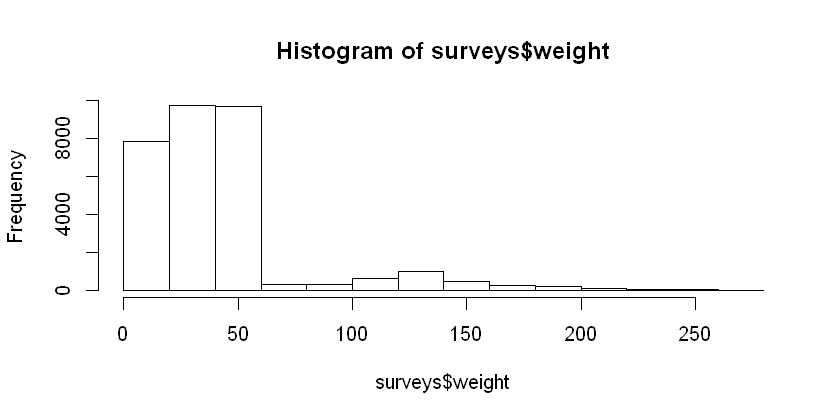

In [168]:
hist(surveys$weight)

You can change the appearance of the graph using arguments. Take a look the "help file" of the `hist()` function by typing in the <span class="console"></span> `?hist()`.

Below we made the same graph, but with red bars and custom-made axis labels:

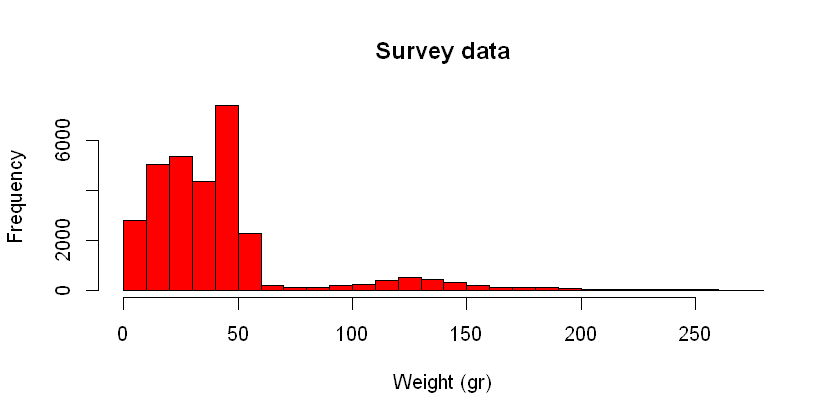

In [169]:
hist(surveys$weight, col = "red", breaks = 25, xlab="Weight (gr)", main = "Survey data")

<span class="note"></span> To improve readability, it is common to split the arguments in many lines; particularly when using many arguments (more than can fit in one line of code). For example, to make the same graph above, you can do:

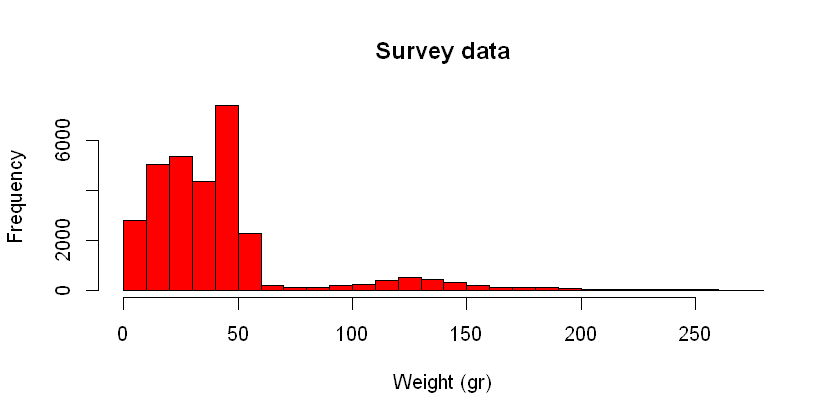

In [170]:
hist(surveys$weight,
     col = "red",
     breaks = 25,
     xlab="Weight (gr)",
     main = "Survey data")

<div class="Q"><br>
    
What class of object is <b>surveys</b>?

<br><br>
<span class="codeerror">
Use: Multiple choice<br>
Correct: Data frame<br>
    Other choices: vector, list, matrix, factor<br></span>
    

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>
    
In the example above, in the line...
    
<span class="codeX">hist(surveys$weight, col = "red", breaks = 25, xlab="Weight (gr)", main = "Survey data")</span> <br>
    
    
What is <b>hist</b>?

<br><br>
<span class="codeerror">
Use: Multiple choice<br>
Correct: function<br>
    Other choices: variable, ordered argument, named argument, data comment<br></span>
    

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>
    
In the example above, in the line...
    
<span class="codeX">hist(surveys$weight, col = "red", breaks = 25, xlab="Weight (gr)", main = "Survey data")</span> <br>
    
    
What is <b>surveys$weight</b>?

<br><br>
<span class="codeerror">
Use: Multiple choice<br>
Correct: ordered argument<br>
    Other choices: variable, function, named argument, data comment<br></span>
    

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>
    
In the example above, in the line...
    
<span class="codeX">hist(surveys$weight, col = "red", breaks = 25, xlab="Weight (gr)", main = "Survey data")</span> <br>
    
    
What is <b>col = "red"</b>?

<br><br>
<span class="codeerror">
Use: Multiple choice<br>
Correct: named argument<br>
    Other choices: variable, function, ordered argument, data comment<br></span>
    

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>
    
In the example above, in the line...
    
<span class="codeX">hist(surveys$weight, col = "red", breaks = 25, xlab="Weight (gr)", main = "Survey data")</span> <br>
    
    
What is <b>breaks = 25</b>?

<br><br>
<span class="codeerror">
Use: Multiple choice<br>
Correct: named argument<br>
    Other choices: variable, function, ordered argument, data comment<br></span>
    

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>
    
In the example above, in the line...
    
<span class="codeX">hist(surveys$weight, col = "red", breaks = 25, xlab="Weight (gr)", main = "Survey data")</span> <br>
    
    
What is <b>xlab="Weight (gr)"</b>?

<br><br>
<span class="codeerror">
Use: Multiple choice<br>
Correct: named argument<br>
    Other choices: variable, function, ordered argument, data comment<br></span>
    

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>
    
In the example above, in the line...
    
<span class="codeX">hist(surveys$weight, col = "red", breaks = 25, xlab="Weight (gr)", main = "Survey data")</span> <br>
    
    
What is <b>main = "Survey data"</b>?

<br><br>
<span class="codeerror">
Use: Multiple choice<br>
Correct: named argument<br>
    Other choices: variable, function, ordered argument, data comment<br></span>
    

<br><br><div class="qhelp"></div></div>

-------------------

When we just need to take a quick look at the data, we do not need fancy colours or axis labels. However, often we may need to add more bars, to take a "finer" look at the pattern in frequency distribution:

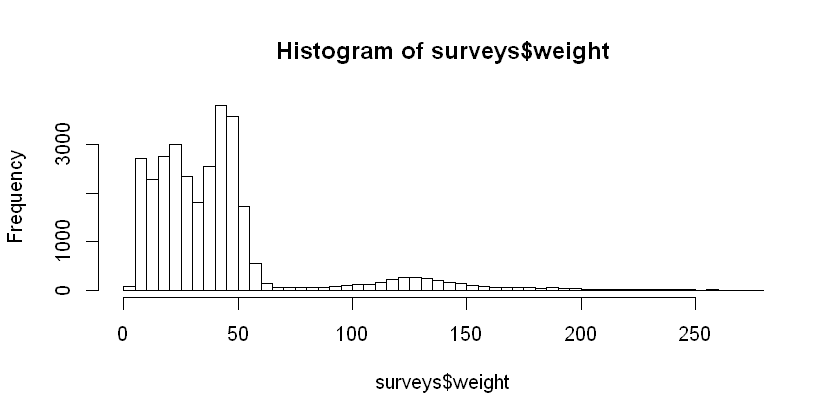

In [174]:
hist(surveys$weight, breaks = 50)

If we want to only see the data of one **genus**, we can further slice our data using a conditional statement. For example:

    surveys$weight[surveys$genus == "Dipodomys"]

This does not return all of the elements in column `weight` of data frame `surveys`, but only returns the columns matching the following statement <span class="codeX">surveys$genus == "Dipodomys"</span>, that is all row with the genus 'Dipodomys'. Take a moment to make sure you understand the example below:

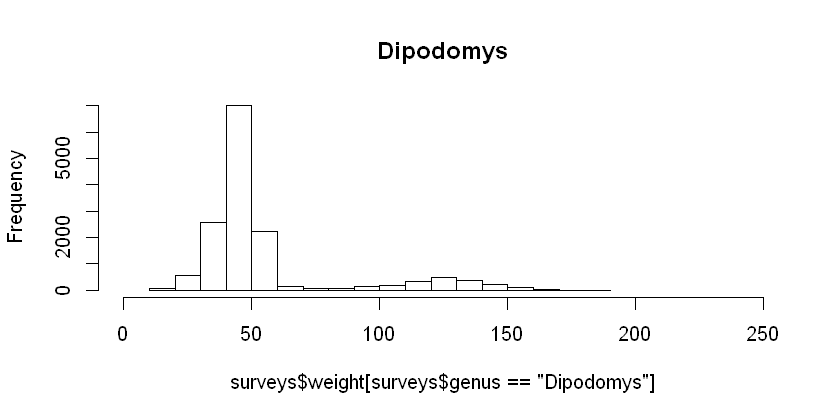

In [178]:
hist(surveys$weight[surveys$genus == "Dipodomys"],
     breaks = 20,
     xlim = c(0,250),
     main = genus)

<div class="Q"><br>

Take a look at the histogram above. What kind of distribution best describes the frequency distribution of <b>Dipodomys</b>  genus?

<span class="codeerror">Only two choices: Unimodal, Bimodal<br>
    Correct: Bimodal<br>

<br><br><div class="qhelp"></div></div>

We can plot another genus and accurate complare it with the above plot as long as we keep the range of the x axis the same in both plots; that is, both have the argument `xlim = c(0,250)`:

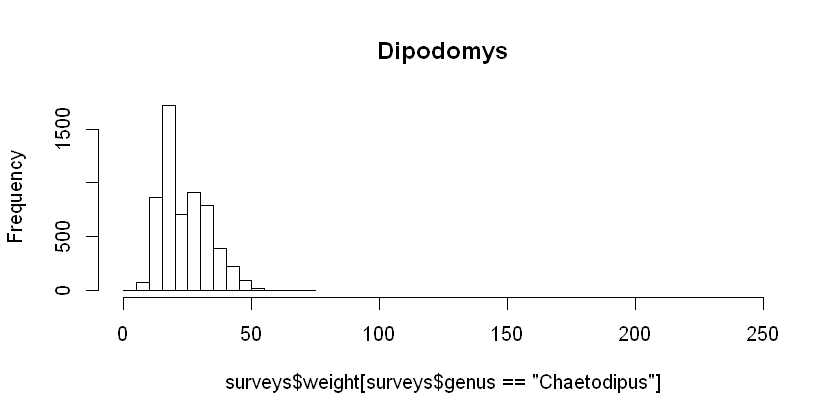

In [180]:
hist(surveys$weight[surveys$genus == "Chaetodipus"],
     breaks = 20,
     xlim = c(0,250),
     main = genus)

<div class="Q"><br>

Take a look at the histogram above. What kind of distribution best describes the frequency distribution of <b>Chaetodipus</b> genus?

<span class="codeerror">Only two choices: Unimodal, Bimodal<br>
    Correct: Unimodal<br>

<br><br><div class="qhelp"></div></div>

<br><br><br>
<div class="startTASK"></div>

Plot a histogram displaying the frequency distribution of **Onychomys** genus.

<div class="endTASK"></div>
<br><br><br>

<div class="Q"><br>

Take a look at the histogram above. What kind of distribution best describes the frequency distribution of <b>Onychomys</b> genus?

<span class="codeerror">Only two choices: Unimodal, Bimodal<br>
    Correct: Unimodal<br>

<br><br><div class="qhelp"></div></div>

## Boxplot

A boxplot — also called a box and whisker plot — displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum. In a boxplot, we draw a box from the first quartile to the third quartile. In *base* R, the function to make boxplots is `boxplot()`:

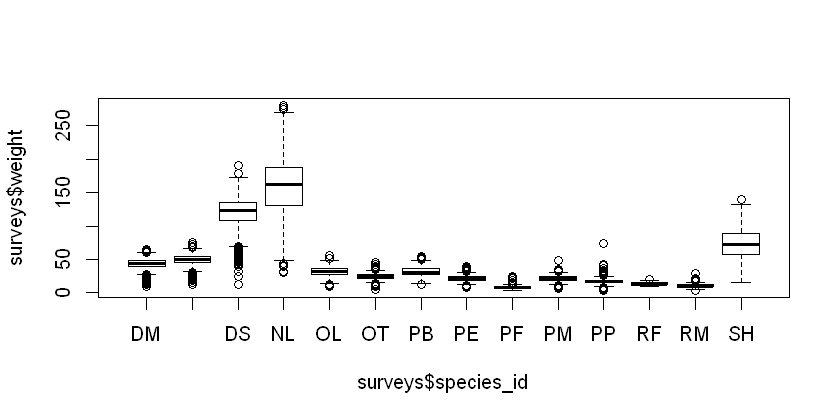

In [194]:
boxplot(surveys$weight ~ surveys$species_id)

We can use the `subset()` function to make a subset data.frame that only includes a few genuses:

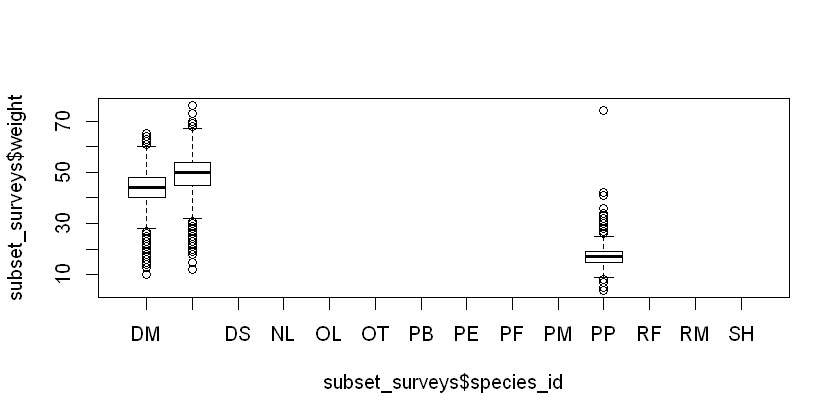

In [195]:
subset_surveys <- subset(surveys, species_id == "DO" |
                                  species_id == "DM" |
                                  species_id == "PP")

boxplot(subset_surveys$weight ~ subset_surveys$species_id)

Take a look at the help file of `boxplot()` and answer the following question:

In [ ]:
?boxplot

<div class="Q"><br>

After taking a look at the "help file" of boxplot, what does the argument <b>range</b> do?

<span class="codeerror">Correct: determines how far the plot whiskers extend out from the box<br>
    Wrong:  specifies data from which the boxplots are to be produced<br>
    Wrong:  optional vector specifying a subset of observations to be used for plotting<br>
    Wrong:  vector giving the relative widths of the boxes making up the plot<br>
    

<br><br><div class="qhelp"></div></div>

## Scatterplots

A scatterplot is a type of data display that shows the relationship between two numerical variables. Each member of the dataset gets plotted as a point whose x-y coordinates relates to its values for the two variables. To make a scatter plot, use the built-in function `plot()`:

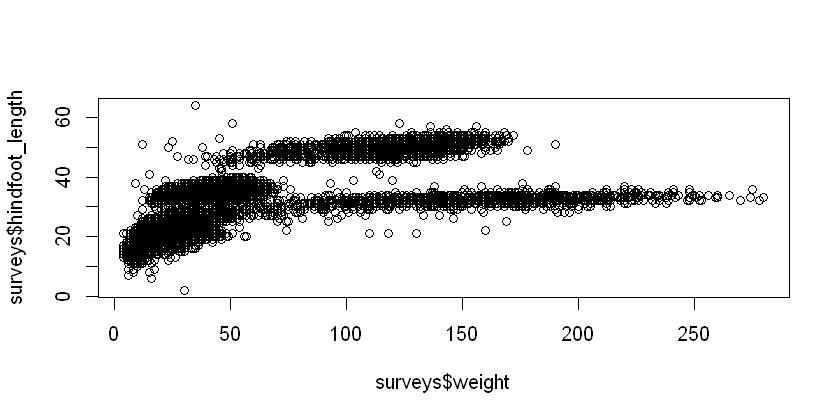

In [196]:
plot(surveys$weight,surveys$hindfoot_length)

For more complicated scatterplots (actually, this applies to all *base* R graphs), you can (1) make a plot, then (2) ad points, lines, etc to the plot.

Take a look at the example below. You can see that it takes many lines of code to color-code 3 genuses. Remember this when we do a similar plot below using `ggplot` where a better looking color-coded plot can be done with just 3 lines of code. This example shows the differences between low-level and high-level plotting.

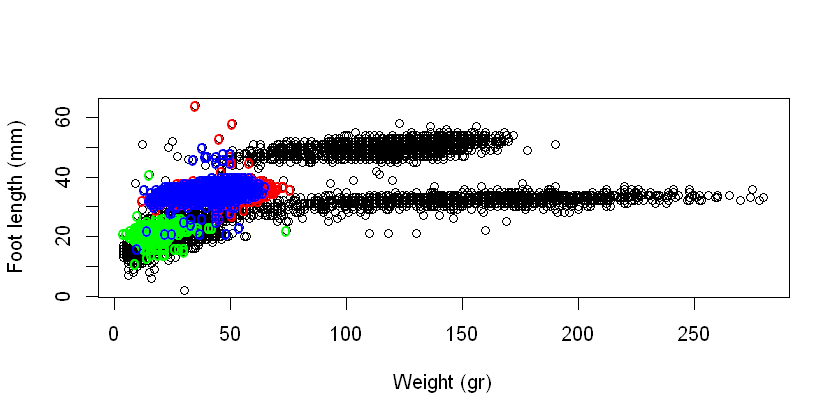

In [197]:
plot(surveys$weight,surveys$hindfoot_length,
    xlab="Weight (gr)", ylab="Foot length (mm)")

points(surveys$weight[surveys$species_id == 'PP'],
       surveys$hindfoot_length[surveys$species_id == 'PP'],
       col="green", pch="o",lty=1)

points(surveys$weight[surveys$species_id == 'DO'],
       surveys$hindfoot_length[surveys$species_id == 'DO'],
       col="red", pch="o",lty=2)

points(surveys$weight[surveys$species_id == 'DM'],
       surveys$hindfoot_length[surveys$species_id == 'DM'],
       col="blue", pch="o",lty=3)

legend(5,250,legend=c('PP','DO','RO'),col=c("green","red","blue"),pch='o',lty=c(1,2,3))

<div class="Q"><br>

1) Using the <b>subset</b> function from the boxplot example, create a data.frame that only includes the "DM" <b>species_id</b><br>

2) Create a scatterplot of weight vs hindfoot_length<br>
    
3) Make markers "red"<br>
    
4) Make x and y axis labels that include units (use graph above as example)<br>
    
5) In RStudio's Plots panel, click on "Export", save your plot as Image, and upload the image to this Brightspace question
    
6) Copy-paste code: "Copy" the code you used to make the plot, "paste" code to this Brightspace question

<span class="codeerror">Use: "Written Response" question<br>
    Make sure to "Enable inserted images and attachments"<br>
    

<br><br><div class="qhelp"></div></div>

## Heatmaps and countour plots

Heatmaps are a colored representatinon of a 2-D matrix of data. They are essential when plotting maps with topography (like below) and any other spatial data.

Our `surveys` data has no spatial information and thus it is not suited for countour plotting. Luckly R comes with a spatial dataset (called `volcano`) to use in examples of this nature. Take a look at the plot below:


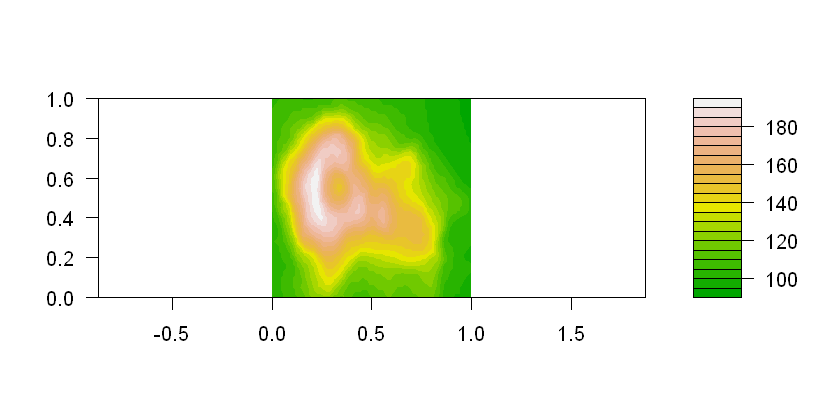

In [198]:
# Load data
data(volcano)

# Make countour plot
filled.contour(volcano, color = terrain.colors, asp = 1)

# Plotting with ggplot2

`ggplot2` is a plotting package that makes it simple to create complex plots from data in a data frame. It provides a more programmatic interface for specifying what variables to plot, how they are displayed, and general visual properties. Therefore, we only need minimal changes if the underlying data change or if we decide to change from a bar plot to a scatterplot. This helps in creating high quality plots with minimal amounts of adjustments and tweaking... saving a lot of time!

Here are a few usefull links about ggplot:

* [ggplot documentation](https://ggplot2.tidyverse.org/reference/)
* [ggplot cheat-sheet](https://rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf)
* [The grammar of Graphics](https://www.springer.com/us/book/9781475731002)

Also, take a look at some galleries to see exampleas and get ideas:

* [Top 50 ggplot2 Visualizations](http://r-statistics.co/Top50-Ggplot2-Visualizations-MasterList-R-Code.html)
* [The R Graph Gallery](https://www.r-graph-gallery.com/index.html)
* [STHA](http://www.sthda.com/english/wiki/be-awesome-in-ggplot2-a-practical-guide-to-be-highly-effective-r-software-and-data-visualization)

## The basics

Before we start, we need the ggplot package. You probably already have it installed, but if not, type the following in the <span class="console"></span>:

In [9]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

`ggplot2` functions like data in the 'long' format, i.e., a column for every dimension, and a row for every observation. Well-structured data will save you lots of time when making figures with ggplot2

`ggplot` graphics are built step by step by adding new elements. Adding layers in this fashion allows for extensive flexibility and customization of plots.

To build a ggplot, we will use the following basic template that can be used for different types of plots:

`ggplot(data = <DATA>, mapping = aes(<MAPPINGS>)) +  <GEOM_FUNCTION>() + <FACET_GRID>()`


where:

1.  `ggplot()`: start an object and specify the data

2.  `aes()`: specifies the "aesthetic" elements; a legend is automatically created

3.  `geom_point()`: specifies the type of plot we want (e.g. geom_point = scatter plot); a "type" is called a "geom"

4.  `facet_grid()`: specifies the "faceting" or panel layout

There are also statistics, scales, and annotation options, among others. At a minimum, you must specify the data, some aesthetics, and a geom. Faceting is useful when you want to create the same figure using subsets of your data.

-------

Lets do an example:

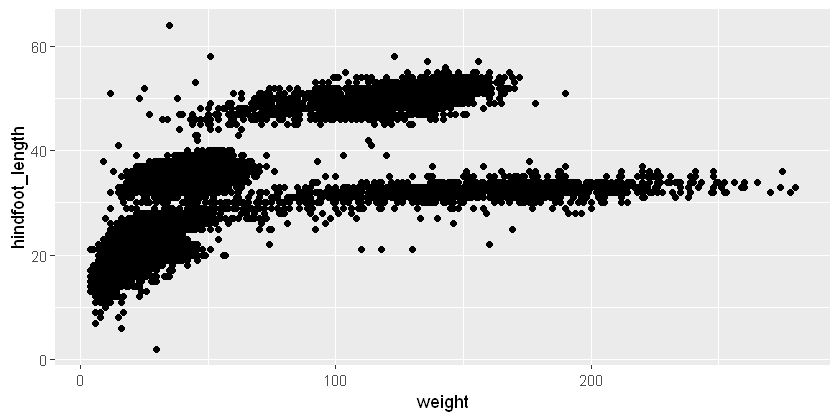

In [199]:
ggplot(data = surveys, aes(x = weight, y = hindfoot_length)) + geom_point()

Nice! One line of code to make a pretty good looking graph. 

To better understand, how `ggplot` works, lets break the one line of code into its three main elements:

First, lets **ONLY** use the `ggplot()` function and bind the plot to a specific data frame using the data argument. In this example, we on purpose will **NOT** specify aesthetic nor a geom:

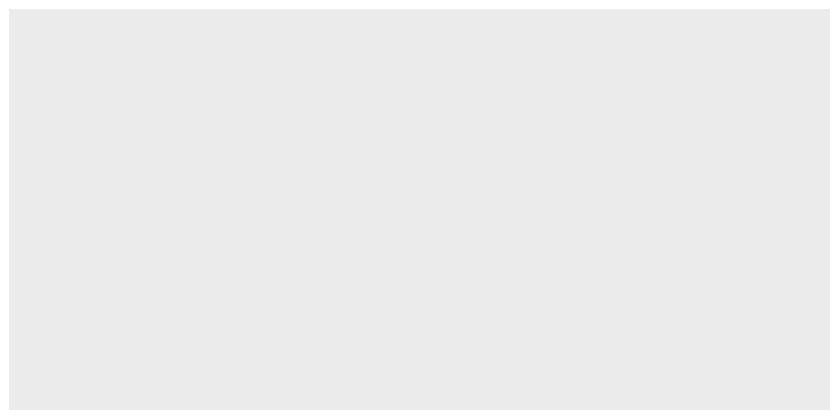

In [200]:
ggplot(data = surveys)

As you can see, this makes a plot, but it does not puts anything inside it.

### Aesthetics

Aesthetics refer to the attributes of the data you want to display. They map the data to an attribute (such as the size or shape of a symbol) and generate an appropriate legend. Aesthetics are specified with the `aes()` function.

As an example, the aesthetics available for `geom_point()` are: `x`, `y`, `alpha`, `colour`, `fill`, `shape`, and `size`. Read the help files to see the aesthetic options for the geom you’re using. They’re generally self explanatory. Aesthetics can be specified within the main `ggplot()` function or within a `geom()`. If they’re specified within the main `ggplot()` function then they apply to all geoms you specify.

Note the important difference between specifying characteristics like colour and shape inside or outside the `aes()` function: those inside the `aes()` function are assigned the colour or shape automatically based on the data.

Lets continue with our piece-by-piece example, this time we will initially the plot and bind it to specific data frame using the `ggplot()` function (just a s above), but here we will also **define an aesthetic mapping**. However in this example, we on purpose will NOT specify a geom:

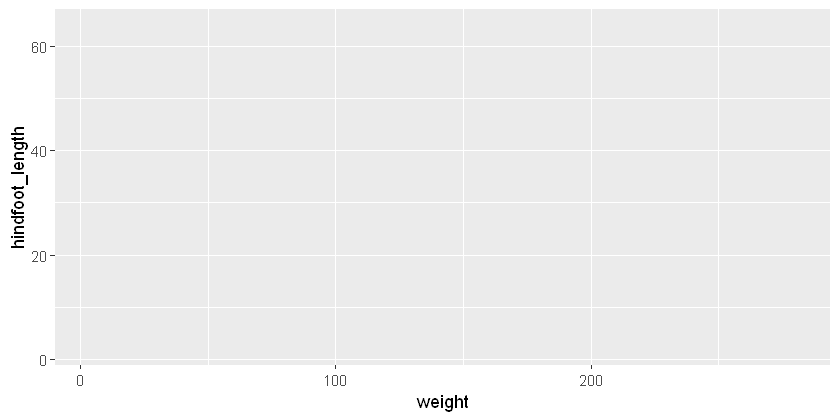

In [201]:
ggplot(data = surveys, mapping = aes(x = weight, y = hindfoot_length))

Here you can see that the plot was made, **and also** the x and y labels were automatically made as well as data ranges and grid lines.

### Geoms

`geoms` in ggplot refers to **geometric objects**, or what we typically think of in a plot. 'geoms' specify graphical representations of the data in the plot (points, lines, bars). `ggplot2` offers many different geoms

**Here are some common ones...**
* `geom_point()` for scatter plots, dot plots, etc.
* `geom_boxplot(`) for box and whiskers plot (in the style of Tukey)
* `geom_line()` for trend lines, time series, etc.

**Here are others...**
* `geom_abline()` `geom_hline()` `geom_vline()` - Reference lines: horizontal, vertical, and diagonal
* `geom_bar()` `geom_col()` `stat_count()` - Bar charts
* `geom_bin2d()` `stat_bin_2d()` - Heatmap of 2d bin counts
* `geom_blank()` - Draw nothing
* `geom_boxplot()` `stat_boxplot()` - A box and whiskers plot (in the style of Tukey)
* `geom_contour()` `stat_contour()` - 2d contours of a 3d surface
* `geom_count()` `stat_sum()` - Count overlapping points
* `geom_density()` `stat_density()` - Smoothed density estimates
* `geom_density_2d()` `stat_density_2d()` - Contours of a 2d density estimate
* `geom_dotplot()` - Dot plot 
* `geom_errorbarh()` - Horizontal error bars
* `geom_hex()` `stat_bin_hex()` - Hexagonal heatmap of 2d bin counts
* `geom_freqpoly()` `geom_histogram()` `stat_bin()` - Histograms and frequency polygons
* `geom_jitter()` - Jittered points
* `geom_crossbar()` `geom_errorbar()` `geom_linerange()` `geom_pointrange()` - Vertical intervals: lines, crossbars & errorbars
* `geom_map()` -Polygons from a reference map
* `geom_path()` `geom_line()` `geom_step()` - Connect observations
* `geom_polygon()` -  Polygons
* `geom_qq_line()` `stat_qq_line()` `geom_qq()` `stat_qq()` - A quantile-quantile plot
* `geom_quantile()` `stat_quantile()` - Quantile regression
* `geom_ribbon()` `geom_area()` - Ribbons and area plots	
* `geom_rug()` - Rug plots in the margins	
* `geom_segment()` `geom_curve()` - Line segments and curves
* `geom_smooth()` `stat_smooth()` - Smoothed conditional means	
* `geom_spoke()` - Line segments parameterised by location, direction and distance
* `geom_label()` `geom_text()` - Text	
* `geom_raster()` `geom_rect() geom_tile()`- Rectangles	
* `geom_violin()` `stat_ydensity()` - Violin plot
* `stat_sf()` `geom_sf()` `geom_sf_label()` `geom_sf_text()` `coord_sf()` - Visualise sf objects

To add a geom to the plot, use `+` operator. Because we have two continuous variables, let's use geom_point() first. Note that here we - finally - initiallize the plot, define an aesthetic mapping **AND** specify a geom:

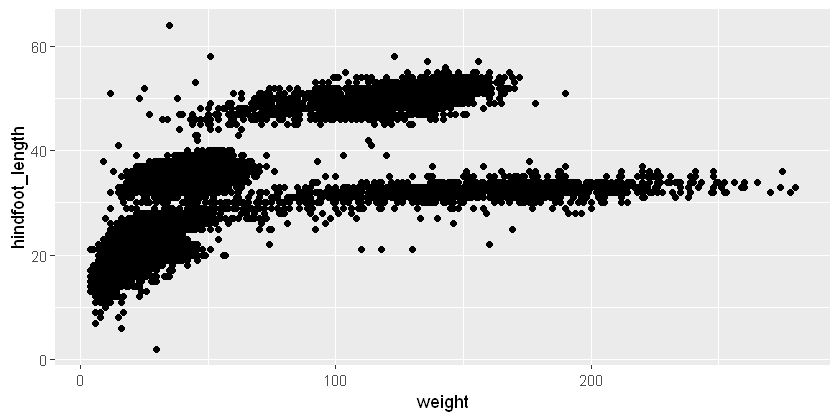

In [202]:
ggplot(data = surveys, aes(x = weight, y = hindfoot_length)) + geom_point()

The `+` in the ggplot2 package is particularly useful because it allows you to modify existing ggplot objects. This means you can easily set up plot "templates" and conveniently explore different types of plots, so the above plot can also be generated with code like this:

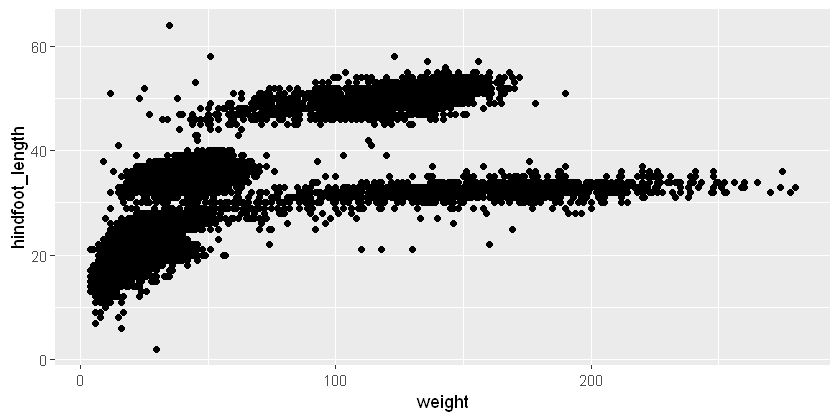

In [203]:
# Assign plot to a variable
surveys_plot <- ggplot(data = surveys, 
                       mapping = aes(x = weight, y = hindfoot_length))

# Draw the plot
surveys_plot + 
    geom_point()

Note that the newly made variable, `surveys_plot`, is a different kind of R-object, it is `ggplot` object!

In [204]:
class(surveys_plot)

[1] "gg"     "ggplot"

Notes

* Anything you put in the `ggplot()` function can be seen by any geom layers that you add (i.e., these are universal plot settings). This includes the x- and y-axis you set up in aes().
* You can also specify aesthetics for a given geom independently of the aesthetics defined globally in the ggplot() function.
* The `+` sign used to add layers must be placed at the end of each line containing a layer. If, instead, the + sign is added in the line before the other layer, ggplot2 will not add the new layer and will return an error message

In [ ]:
# This is the correct syntax for adding layers
surveys_plot +
  geom_point()

# This will not add the new layer and will return an error message
surveys_plot
  + geom_point()

<div class="Q"><br>
    
In the examples above, in the line...
    
<span class="codeX">library(ggplot2)</span> <br>
    
    
What is <b>ggplot2</b>?

<br><br>
<span class="codeerror">
Use: Multiple choice<br>
Correct: package<br>
    Other choices: variable, function, ordered argument, data comment<br></span>
    

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>
    
In the examples above, in the line...
    
<span class="codeX">ggplot(data = surveys, aes(x = weight, y = hindfoot_length)) + geom_point()</span> <br>
    
    
What is <b>ggplot</b>?

<br><br>
<span class="codeerror">
Use: Multiple choice<br>
Correct: function<br>
    Other choices: variable, package, ordered argument, data comment<br></span>
    

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>
    
In the examples above, in the line...
    
<span class="codeX">ggplot(data = surveys, aes(x = weight, y = hindfoot_length)) + geom_point()</span> <br>
    
    
What is <b>data = surveys</b>?

<br><br>
<span class="codeerror">
Use: Multiple choice<br>
Correct: named argument<br>
    Other choices: variable, package, ordered argument, data comment<br></span>
    

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>
    
In the examples above, in the line...
    
<span class="codeX">ggplot(data = surveys, aes(x = weight, y = hindfoot_length)) + geom_point()</span> <br>
    
    
What is <b>geom_point</b>?

<br><br>
<span class="codeerror">
Use: Multiple choice<br>
Correct: function<br>
    Other choices: variable, package, ordered argument, data comment<br></span>
    

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>
    
In the examples above, in the line...
    
<span class="codeX">ggplot(data = surveys, aes(x = weight, y = hindfoot_length)) + geom_point()</span> <br>
    
    
What is <b>aes(x = weight, y = hindfoot_length))</b>?

<br><br>
<span class="codeerror">
Use: Multiple choice<br>
Correct: a function that is used as an argument<br>
    Other choices: variable, package, data, comment<br></span>
    

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>
    
In the examples above, in the line...
    
<span class="codeX">surveys_plot = ggplot(data = surveys, mapping = aes(x = weight, y = hindfoot_length))</span> <br>
    
    
What is <b>surveys_plot</b>?

<br><br>
<span class="codeerror">
Use: Multiple choice<br>
Correct: variable<br>
    Other choices: ordered argument, named argument, package, data, comment<br></span>
    

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>
    
In the examples above, in the line...
    
<span class="codeX">surveys_plot = ggplot(data = surveys, mapping = aes(x = weight, y = hindfoot_length))</span> <br>
    
    
What type of object is <b>surveys_plot</b>?

<br><br>
<span class="codeerror">
Use: Multiple choice<br>
Correct: a 'ggplot' object<br>
    Other choices: data frame, list, matrix, vector, atomic vector, factor<br></span>
    

<br><br><div class="qhelp"></div></div>

## Building your plots iteratively (scatterplot)

Building plots with ggplot2 is typically an iterative process. We start by defining the dataset we'll use, lay out the axes, and choose a geom

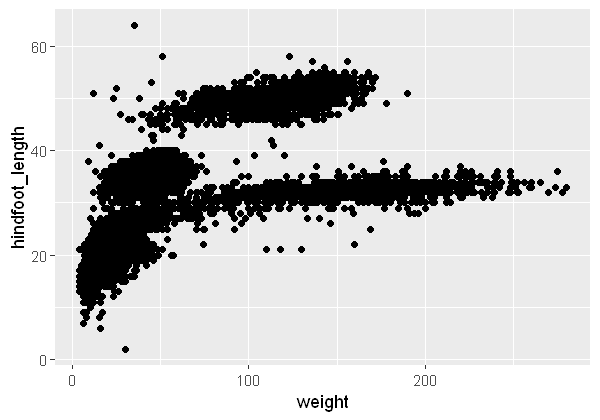

In [120]:
ggplot(data = surveys, aes(x = weight, y = hindfoot_length)) +
    geom_point()

### Transparency

Then, we start modifying this plot to extract more information from it. For instance, we can add transparency (alpha) to avoid overplotting:

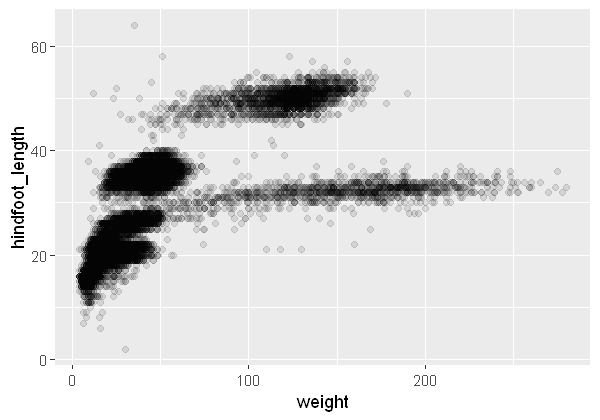

In [121]:
ggplot(data = surveys, aes(x = weight, y = hindfoot_length)) +
    geom_point(alpha = 0.1)

### Color

We can also add colors for all the points:

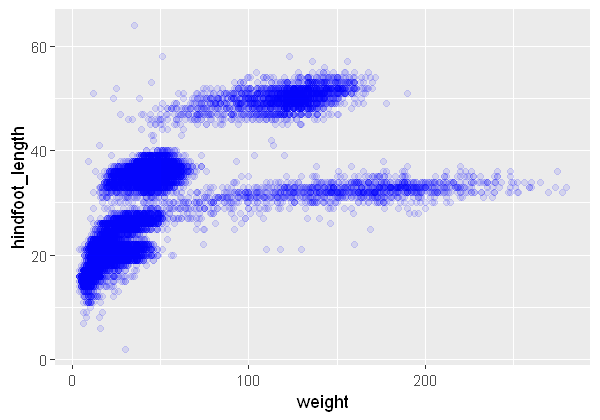

In [122]:
ggplot(data = surveys, mapping = aes(x = weight, y = hindfoot_length)) +
    geom_point(alpha = 0.1, color = "blue")

Or to color each species in the plot differently, you could use a vector as an input to the argument color. ggplot2 will provide a different color corresponding to different values in the vector. Here is an example where we color with species_id:

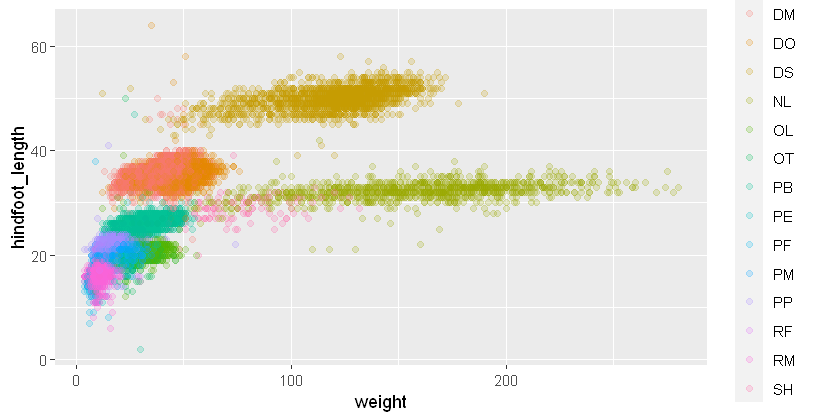

In [188]:
ggplot(data = surveys, mapping = aes(x = weight, y = hindfoot_length)) +
    geom_point(alpha = 0.2, aes(color = species_id))

### Labeling

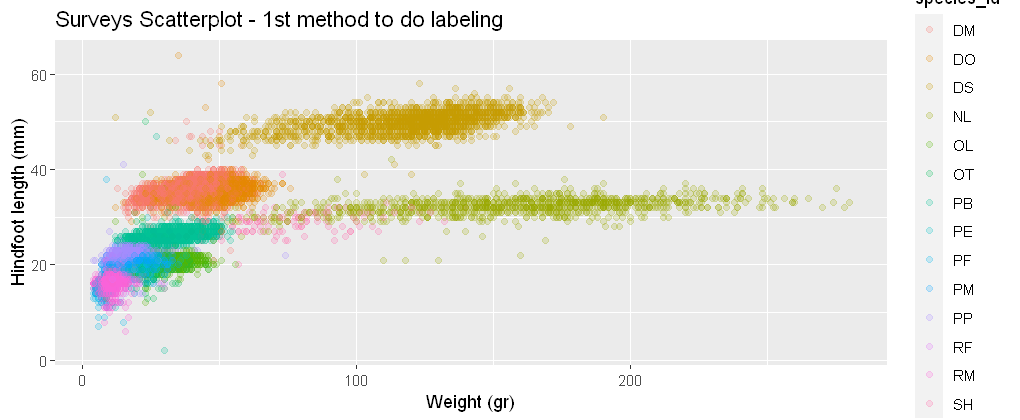

In [155]:
ggplot(data = surveys, mapping = aes(x = weight, y = hindfoot_length)) +
    geom_point(alpha = 0.2, aes(color = species_id)) + 
    ggtitle("Surveys Scatterplot - 1st method to do labeling") +
    xlab("Weight (gr)") +
    ylab("Hindfoot length (mm)")


...or you can do all three lables with on function, `labs()`:

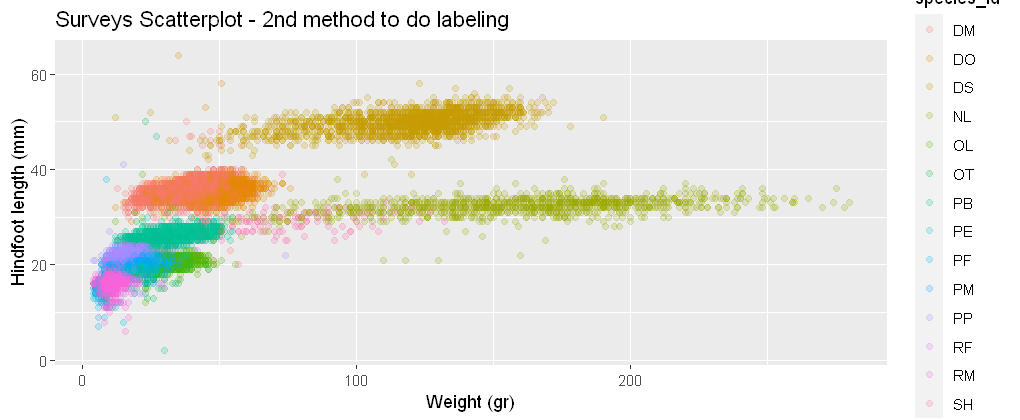

In [154]:
ggplot(data = surveys, mapping = aes(x = weight, y = hindfoot_length)) +
    geom_point(alpha = 0.2, aes(color = species_id)) + 
    labs(title = "Surveys Scatterplot - 2nd method to do labeling",
         x = "Weight (gr)",
         y = "Hindfoot length (mm)")

## Hexagon 2-D histogram

Scatter plots can be useful exploratory tools for small datasets. For data sets with large numbers of observations, such as the surveys_complete data set, overplotting of points can be a limitation of scatter plots. One strategy for handling such settings is to use hexagonal binning of observations. The plot space is tessellated into hexagons. Each hexagon is assigned a color based on the number of observations that fall within its boundaries. To use hexagonal binning with ggplot2, first install the R package hexbin from CRAN

In [ ]:
install.packages("hexbin")
library(hexbin)

Then use the geom_hex() function:

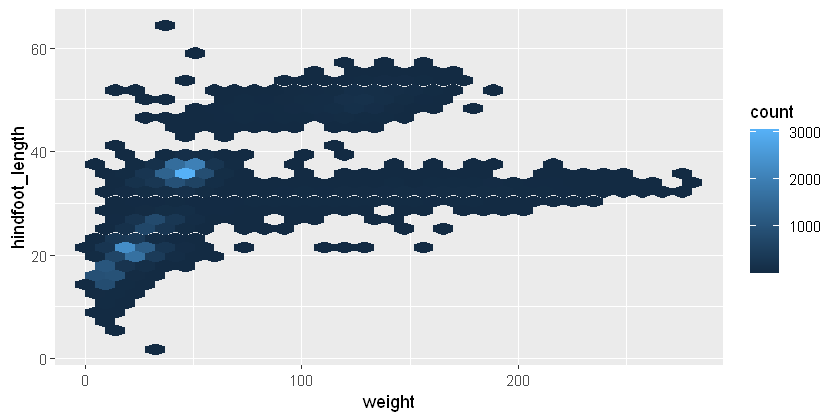

In [189]:
surveys_plot +
 geom_hex()

## Smooth trend line

To add a **smooth trend line** use `geom_smooth()`. This will not only add a "smoothed" version of your data, but it will also add confidence intervals around it. Lets do an example only for the "SH" species_id:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


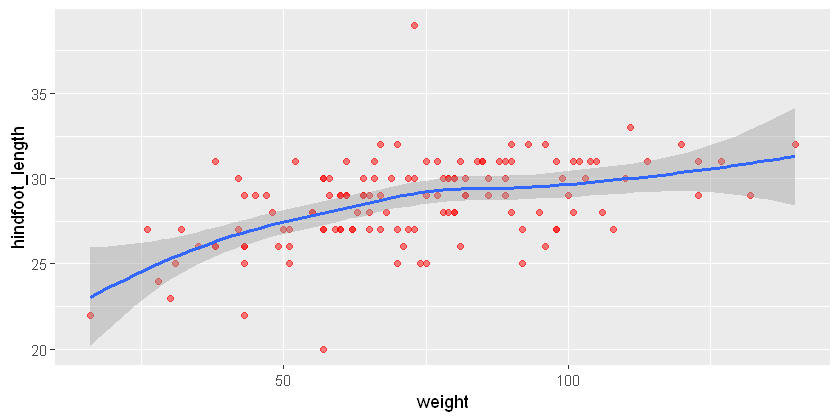

In [190]:
SH_surveys <- subset(surveys, species_id == "SH")

ggplot(data = SH_surveys, mapping = aes(x = weight, y = hindfoot_length)) +
    geom_point(alpha = 0.5, color = "red") + 
    geom_smooth()

<div class="Q"><br>

1) Using the <b>subset</b> function from the example above, create a data.frame that only includes the "DM" <b>species_id</b><br>

2) Create a <b>ggplot</b> scatterplot of weight vs hindfoot_length<br>
    
3) Make markers "red"<br>
    
4) Make x and y axis labels that include units (use graph from "labeling" section as example)<br>
    
5) Make markers transparent (alpha = 0.5)<br>

6) Include a smoothed trend line with confidence intervals<br>
    
7) In RStudio's Plots panel, click on "Export", save your plot as Image, and upload the image to this Brightspace question
    
6) Copy-paste code: "Copy" the code you used to make the plot, "paste" code to this Brightspace question

<span class="codeerror">Use: "Written Response" question<br>
    Make sure to "Enable inserted images and attachments"<br>
    

<br><br><div class="qhelp"></div></div>

## Boxplot

We can use boxplots to visualize the distribution of weight within each species:

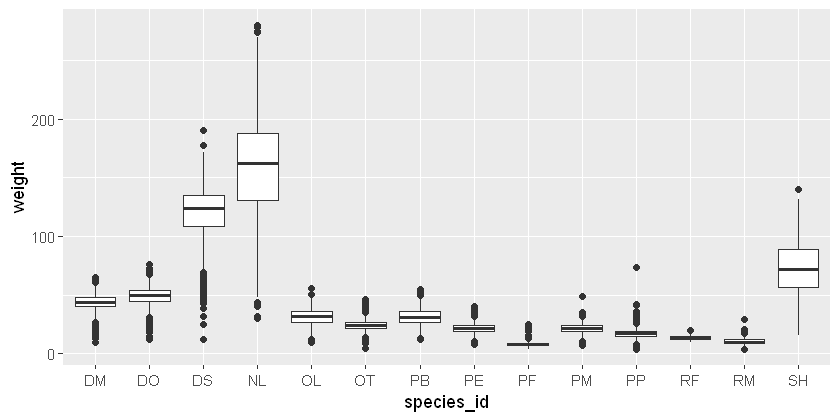

In [191]:
ggplot(data = surveys, mapping = aes(x = species_id, y = weight)) +
    geom_boxplot()

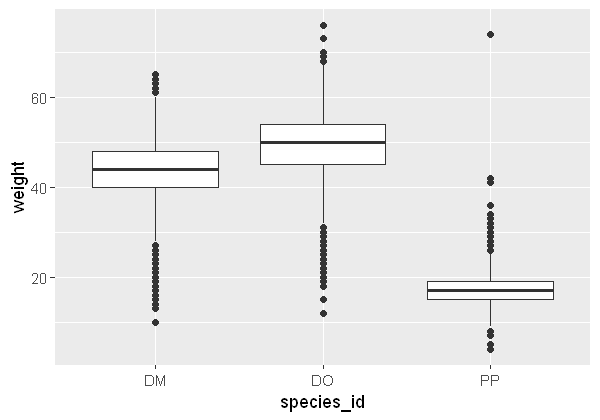

In [137]:
ggplot(data = subset_surveys, mapping = aes(x = species_id, y = weight)) +
    geom_boxplot()

By adding points to the boxplot, we can have a better idea of the number of measurements and of their distribution:

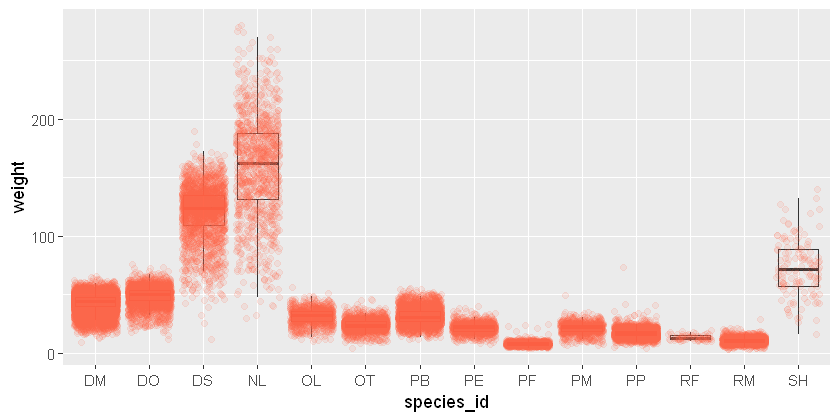

In [192]:
ggplot(data = surveys, mapping = aes(x = species_id, y = weight)) +
    geom_boxplot(alpha = 0) +
    geom_jitter(alpha = 0.1, color = "tomato")

Notice how the boxplot layer is behind the jitter layer? What do you need to change in the code to put the boxplot in front of the points such that it's not hidden?

<div class="Q"><br>
    
In the examples above, in the line...
    
<span class="codeX">ggplot(data = surveys, mapping = aes(x = species_id, y = weight)) +</span> <br>
<span class="codeX">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;geom_boxplot(alpha = 0) +</span> <br>
<span class="codeX">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;geom_jitter(alpha = 0.1, color = "tomato")</span> <br>

<br>
    
What is <b>ggplot</b>?

<br><br>
<span class="codeerror">
Use: Multiple choice<br>
Correct: function<br>
    Other choices: variable, package, ordered argument, named argument, data, comment<br></span>
    

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>
    
In the examples above, in the line...
    
<span class="codeX">ggplot(data = surveys, mapping = aes(x = species_id, y = weight)) +</span> <br>
<span class="codeX">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;geom_boxplot(alpha = 0) +</span> <br>
<span class="codeX">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;geom_jitter(alpha = 0.1, color = "tomato")</span> <br>

<br>
    
What is <b>geom_boxplot</b>?

<br><br>
<span class="codeerror">
Use: Multiple choice<br>
Correct: function<br>
    Other choices: variable, package, ordered argument, named argument, data, comment<br></span>
    

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>
    
In the examples above, in the line...
    
<span class="codeX">ggplot(data = surveys, mapping = aes(x = species_id, y = weight)) +</span> <br>
<span class="codeX">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;geom_boxplot(alpha = 0) +</span> <br>
<span class="codeX">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;geom_jitter(alpha = 0.1, color = "tomato")</span> <br>

<br>
    
What is <b>geom_jitter</b>?

<br><br>
<span class="codeerror">
Use: Multiple choice<br>
Correct: function<br>
    Other choices: variable, package, ordered argument, named argument, data, comment<br></span>
    

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>
    
In the examples above, in the line...
    
<span class="codeX">ggplot(data = surveys, mapping = aes(x = species_id, y = weight)) +</span> <br>
<span class="codeX">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;geom_boxplot(alpha = 0) +</span> <br>
<span class="codeX">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;geom_jitter(alpha = 0.1, color = "tomato")</span> <br>

<br>
    
What is <b>mapping = aes(x = species_id, y = weight)</b>?

<br><br>
<span class="codeerror">
Use: Multiple choice<br>
Correct: named argument<br>
    Other choices: variable, package, ordered argument, function, data, comment<br></span>
    

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>
    
In the examples above, in the line...
    
<span class="codeX">ggplot(data = surveys, mapping = aes(x = species_id, y = weight)) +</span> <br>
<span class="codeX">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;geom_boxplot(alpha = 0) +</span> <br>
<span class="codeX">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;geom_jitter(alpha = 0.1, color = "tomato")</span> <br>

<br>
    
What is <b>alpha = 0</b>?

<br><br>
<span class="codeerror">
Use: Multiple choice<br>
Correct: named argument<br>
    Other choices: variable, package, ordered argument, function, data, comment<br></span>
    

<br><br><div class="qhelp"></div></div>

<div class="Q"><br>
    
In the examples above, in the line...
    
<span class="codeX">ggplot(data = surveys, mapping = aes(x = species_id, y = weight)) +</span> <br>
<span class="codeX">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;geom_boxplot(alpha = 0) +</span> <br>
<span class="codeX">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;geom_jitter(alpha = 0.1, color = "tomato")</span> <br>

<br>
    
What is <b>color = "tomato"</b>?

<br><br>
<span class="codeerror">
Use: Multiple choice<br>
Correct: named argument<br>
    Other choices: variable, package, ordered argument, function, data, comment<br></span>
    

<br><br><div class="qhelp"></div></div>

## Violin plot

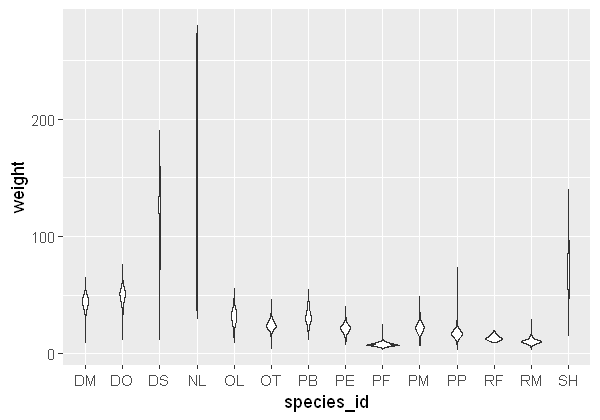

In [127]:
ggplot(data = surveys, mapping = aes(x = species_id, y = weight)) +
    geom_violin()

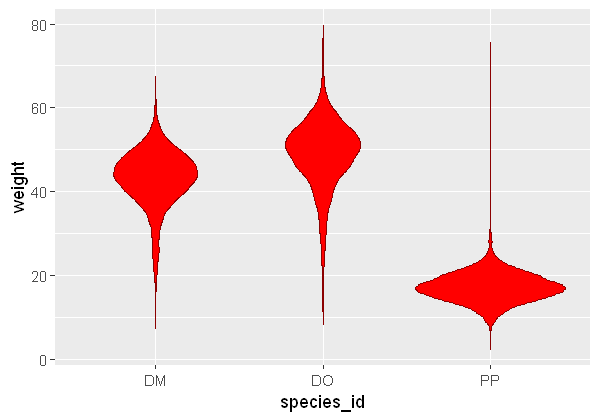

In [141]:
ggplot(data = subset_surveys, mapping = aes(x = species_id, y = weight)) +
    geom_violin(trim=FALSE, fill='red', color="darkred")

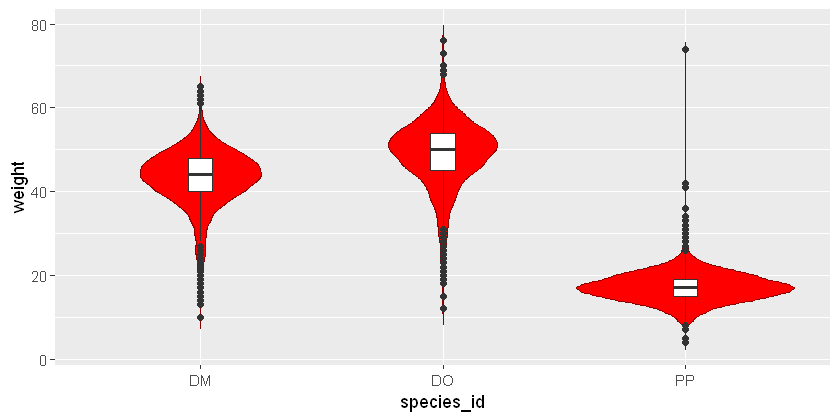

In [193]:
ggplot(data = subset_surveys, mapping = aes(x = species_id, y = weight)) +
    geom_violin(trim=FALSE, fill='red', color="darkred") +
    geom_boxplot(width=0.1)

<div class="Q"><br>
    
You need to replicate the plot below...

1) Using the <b>subset</b> function from the example above, create a data.frame that only includes the "OL" <b>AND</b> "OT"  <b>species_id</b><br>

2) Create a <b>ggplot</b> violin plot with a boxplot superimposed<br>
    
3) For the violin plot, make the "trim" FALSE, make the "fill" to be blue, the "color" to be darkblue, and the transparency to be 0.4<br>

4) For the boxplot, make the "width" 0.1, the "notch" TRUE, "outlier.colour" red, "outlier.fill" darkred, transparency 0.2, and "outlier.size" 3<br>
     
4) Make y axis label to be "weight (gr)"<br>
    
5) Make the plots title to be "Violin/Scatterplot made by My_Name", where you replace"My_Name" with your own name
    
7) In RStudio's Plots panel, click on "Export", save your plot as Image, and upload the image to this Brightspace question
    
6) Copy-paste code: "Copy" the code you used to make the plot, "paste" code to this Brightspace question

<span class="codeerror">Use: "Written Response" question<br>
    Make sure to "Enable inserted images and attachments"<br>
    

<br><br><div class="qhelp"></div></div>

Target plot for question above
<a href="violin_scatterplot.png" target="_blank"><img src="violin_scatterplot.png" width="700px"></a>

## Plotting time series data

First, we are going to cheat a bit; we'll do a bit of data manupulation that we'll learn in the next lab. For now the only thing you need to know is that you need to have the `tideverse` library installed. You probably already have it installed, but if not, typ eth efollowing in the <span class="console"></span>:

In [ ]:
install.packages("dplyr")

The code below counts the number of entries in each year, for every genus. We'll explain more on this next lab.

In [7]:
library(dplyr)

yearly_counts <- surveys %>%
  count(year, genus)

Timelapse data can be visualized as a line plot with years on the x-axis and counts on the y-axis:

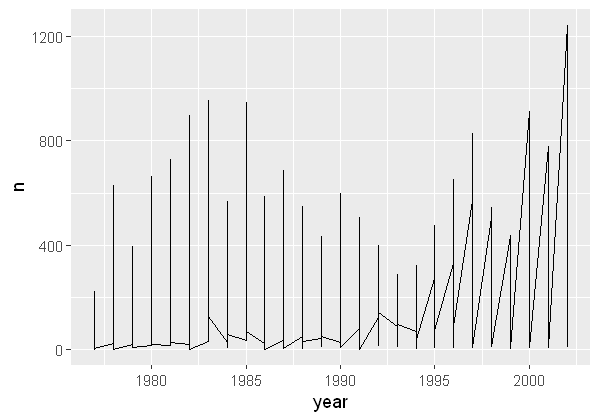

In [12]:
ggplot(data = yearly_counts, aes(x = year, y = n)) +
     geom_line()

Unfortunately, this does not work because we plotted data for all the genera together. We need to tell ggplot to draw a line for each genus by modifying the aesthetic function to include group = genus:

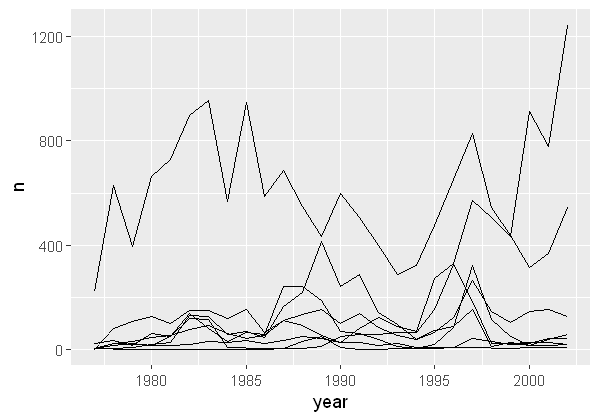

In [13]:
ggplot(data = yearly_counts, aes(x = year, y = n, group = genus)) +
    geom_line()

We will be able to distinguish species in the plot if we add colors (using color also automatically groups the data):

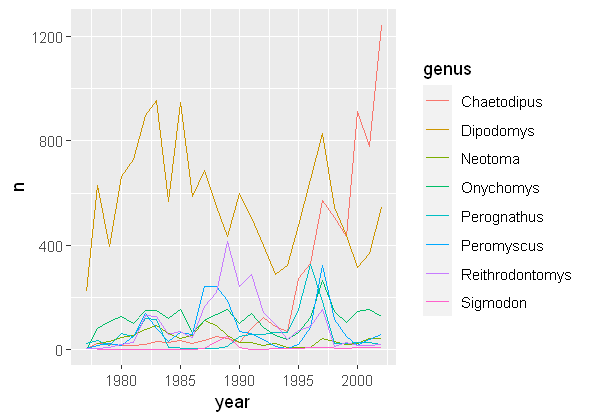

In [14]:
ggplot(data = yearly_counts, aes(x = year, y = n, color = genus)) +
    geom_line()

To change the line type use the argument `linetype`. The opsions are shown below:

<a href="ggplot2_line_type.png" target="_blank"><img src="ggplot2_line_type.png" width="350px"></a>


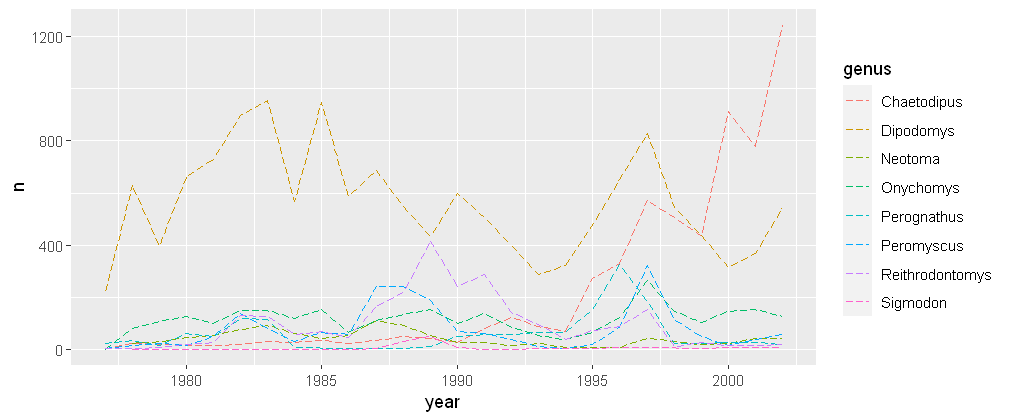

In [156]:
ggplot(data = yearly_counts, aes(x = year, y = n, color = genus)) +
    geom_line(linetype="longdash")

<div class="Q"><br>
    
You need to replicate the plot below...

Essentially you need to replicate the plot above, but with thicker lines (solid)... and with your name in the plot's title. You need to use the "help files" and Google to figure out how to do it. We have not reviewed in this Lab how to change line width, this is a "real-life" research problem.   
    
1) Make the plots title to be "Time-series made by My_Name", where you replace"My_Name" with your own name
    
2) In RStudio's Plots panel, click on "Export", save your plot as Image, and upload the image to this Brightspace question
    
3) Copy-paste code: "Copy" the code you used to make the plot, "paste" code to this Brightspace question

<span class="codeerror">Use: "Written Response" question<br>
    Make sure to "Enable inserted images and attachments"<br>
    

<br><br><div class="qhelp"></div></div>

Target plot for question above
<a href="time_series.png" target="_blank"><img src="time_series.png" width="700px"></a>

## Faceting

ggplot has a special technique called faceting that allows the user to split one plot into multiple plots based on a factor included in the dataset. We will use it to make a time series plot for each species:

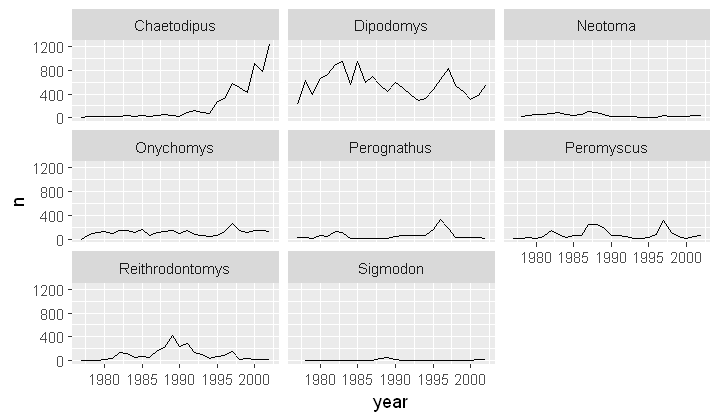

In [59]:
ggplot(data = yearly_counts, aes(x = year, y = n)) +
    geom_line() +
    facet_wrap(facets = vars(genus))

Now we would like to split the line in each plot by the sex of each individual measured. To do that we need to make counts in the data frame grouped by year, genus, and sex:

In [17]:
 yearly_sex_counts <- surveys %>%
                      count(year, genus, sex)

We can now make the faceted plot by splitting further by sex using color (within a single plot):

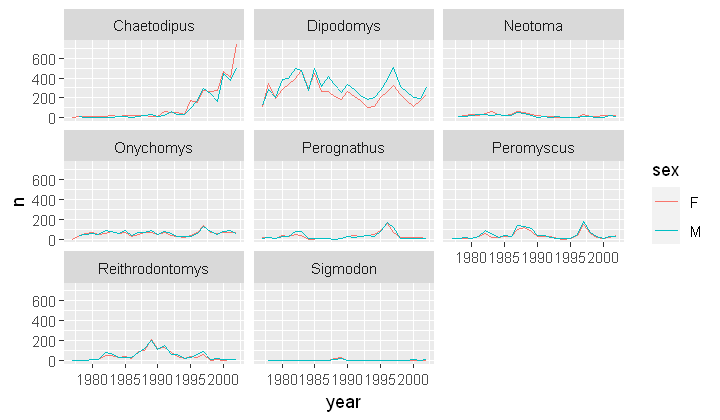

In [60]:
ggplot(data = yearly_sex_counts, mapping = aes(x = year, y = n, color = sex)) +
  geom_line() +
  facet_wrap(facets =  vars(genus))

We can also facet both by sex and genus:

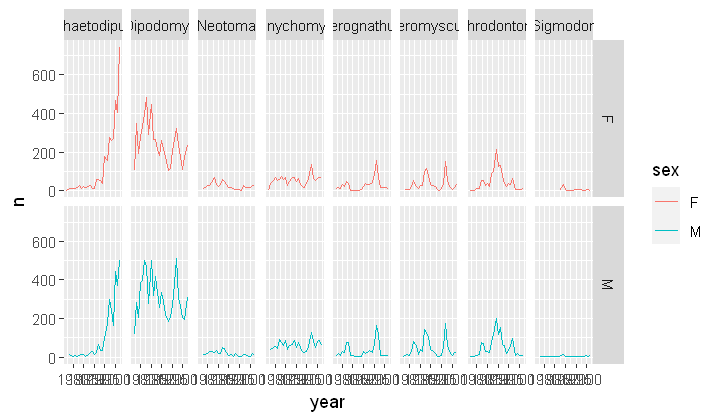

In [61]:
ggplot(data = yearly_sex_counts, 
       mapping = aes(x = year, y = n, color = sex)) +
  geom_line() +
  facet_grid(rows = vars(sex), cols =  vars(genus))

You can also organise the panels only by rows (or only by columns):

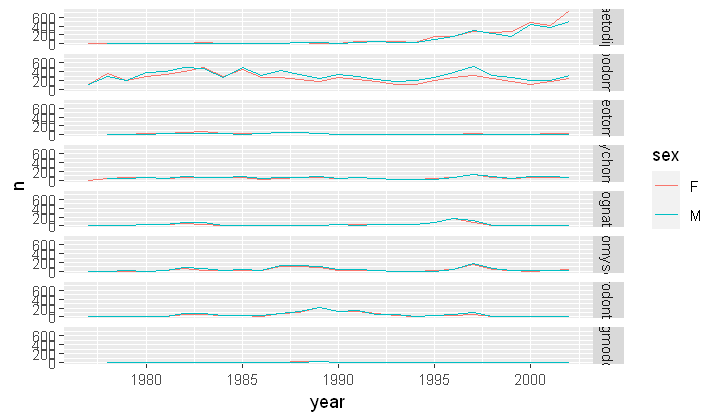

In [62]:
# One column, facet by rows
ggplot(data = yearly_sex_counts, 
       mapping = aes(x = year, y = n, color = sex)) +
  geom_line() +
  facet_grid(rows = vars(genus))

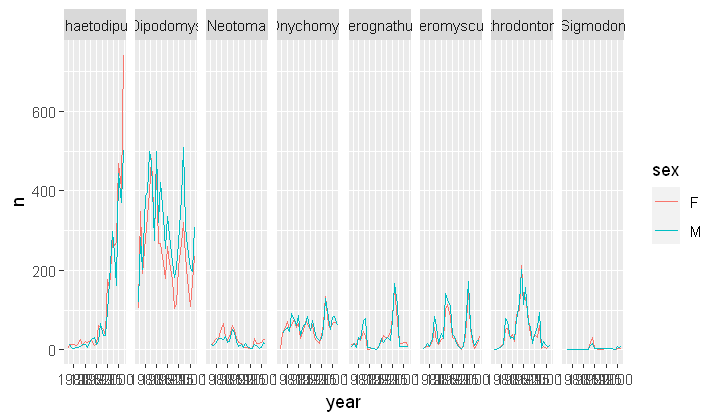

In [63]:
# One row, facet by column
ggplot(data = yearly_sex_counts, 
       mapping = aes(x = year, y = n, color = sex)) +
  geom_line() +
  facet_grid(cols = vars(genus))

## ggplot2 themes

Usually plots with white background look more readable when printed. Every single component of a ggplot graph can be customized using the generic theme() function, as we will see below. However, there are pre-loaded themes available that change the overall appearance of the graph without much effort.

For example, we can change our previous graph to have a simpler white background using the theme_bw() function:

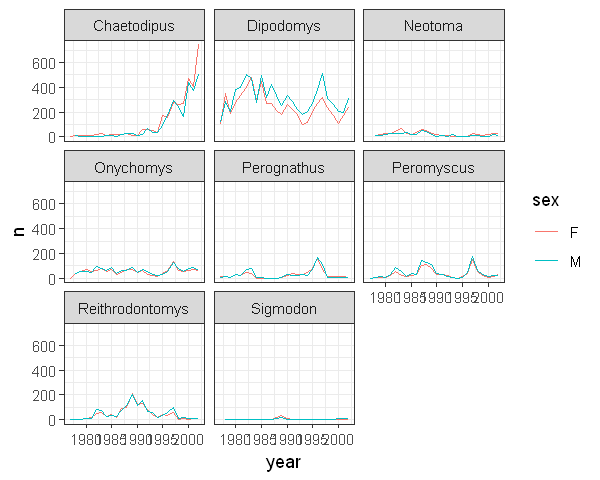

In [97]:
 ggplot(data = yearly_sex_counts, 
        mapping = aes(x = year, y = n, color = sex)) +
     geom_line() +
     facet_wrap(vars(genus)) +
     theme_bw()

In addition to theme_bw(), which changes the plot background to white, ggplot2 comes with several other themes which can be useful to quickly change the look of your visualization. The complete list of themes is available at https://ggplot2.tidyverse.org/reference/ggtheme.html. theme_minimal() and theme_light() are popular, and theme_void() can be useful as a starting point to create a new hand-crafted theme.

The ggthemes package provides a wide variety of options.

Let's do one more theme. Let's do `theme_dark()`:

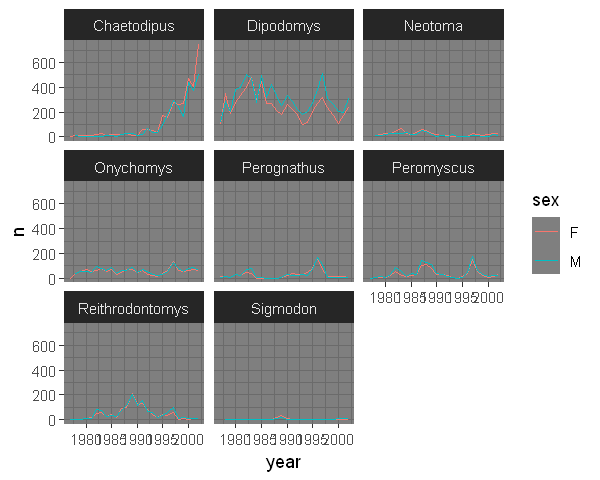

In [98]:
 ggplot(data = yearly_sex_counts, 
        mapping = aes(x = year, y = n, color = sex)) +
     geom_line() +
     facet_wrap(vars(genus)) +
     theme_dark()

<div class="Q"><br>
    
1) Replicate the plot above but with a different them that is NOT theme_bw() or theme_dark().
    
2) Make the plots title to be "Themed plot made by My_Name", where you replace"My_Name" with your own name
    
3) In RStudio's Plots panel, click on "Export", save your plot as Image, and upload the image to this Brightspace question
    
4) Copy-paste code: "Copy" the code you used to make the plot, "paste" code to this Brightspace question

<span class="codeerror">Use: "Written Response" question<br>
    Make sure to "Enable inserted images and attachments"<br>
    

<br><br><div class="qhelp"></div></div>

## Customization

Take a look at the ggplot2 cheat sheet, and think of ways you could improve the plot.

Now, let's change names of axes to something more informative than 'year' and 'n' and add a title to the figure:

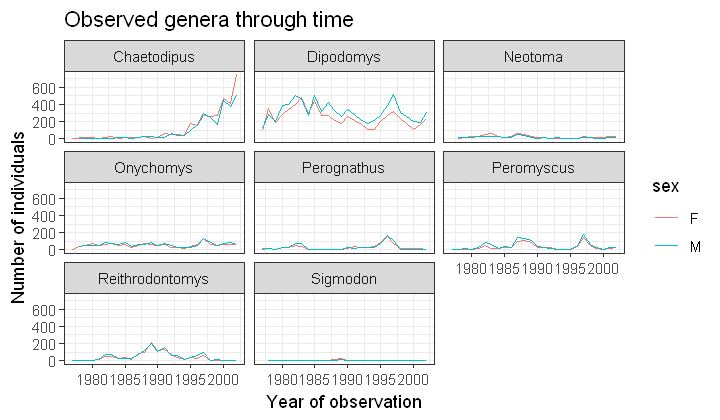

In [65]:
ggplot(data = yearly_sex_counts, aes(x = year, y = n, color = sex)) +
    geom_line() +
    facet_wrap(vars(genus)) +
    labs(title = "Observed genera through time",
         x = "Year of observation",
         y = "Number of individuals") +
    theme_bw()

The axes have more informative names, but their readability can be improved by increasing the font size. This can be done with the generic theme() function:

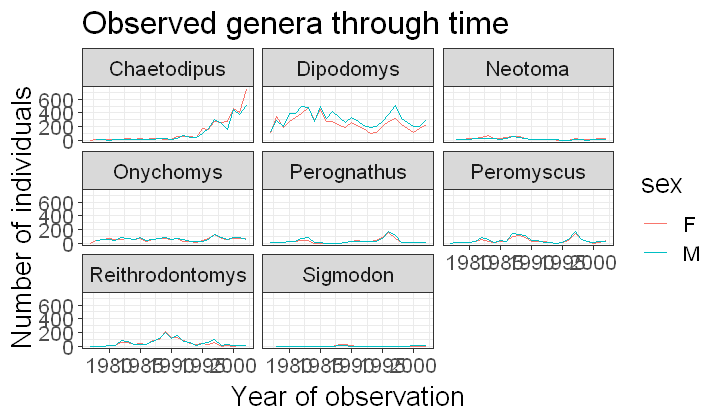

In [66]:
ggplot(data = yearly_sex_counts, mapping = aes(x = year, y = n, color = sex)) +
    geom_line() +
    facet_wrap(vars(genus)) +
    labs(title = "Observed genera through time",
        x = "Year of observation",
        y = "Number of individuals") +
    theme_bw() +
    theme(text=element_text(size = 16))

Note that it is also possible to change the fonts of your plots. If you are on Windows, you may have to install the extrafont package, and follow the instructions included in the README for this package.

After our manipulations, you may notice that the values on the x-axis are still not properly readable. Let's change the orientation of the labels and adjust them vertically and horizontally so they don't overlap. You can use a 90 degree angle, or experiment to find the appropriate angle for diagonally oriented labels. We can also modify the facet label text (strip.text) to italicize the genus names:

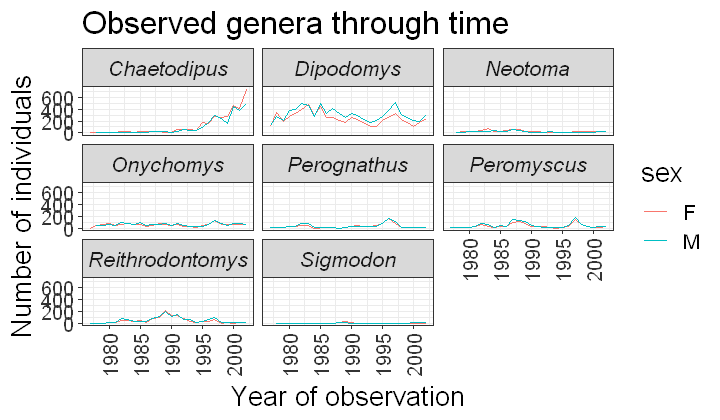

In [67]:
ggplot(data = yearly_sex_counts, mapping = aes(x = year, y = n, color = sex)) +
    geom_line() +
    facet_wrap(vars(genus)) +
    labs(title = "Observed genera through time",
        x = "Year of observation",
        y = "Number of individuals") +
    theme_bw() +
    theme(axis.text.x = element_text(colour = "grey20", size = 12, angle = 90, hjust = 0.5, vjust = 0.5),
                        axis.text.y = element_text(colour = "grey20", size = 12),
                        strip.text = element_text(face = "italic"),
                        text = element_text(size = 16))

If you like the changes you created better than the default theme, you can save them as an object to be able to easily apply them to other plots you may create:

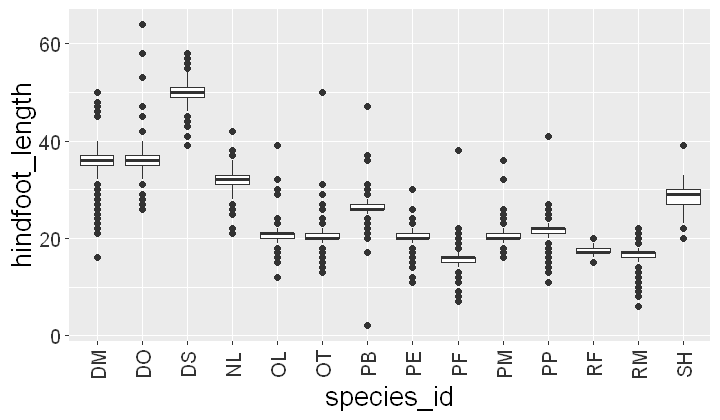

In [69]:
grey_theme <- theme(axis.text.x = element_text(colour="grey20", size = 12, 
                                               angle = 90, hjust = 0.5, 
                                               vjust = 0.5),
                    axis.text.y = element_text(colour = "grey20", size = 12),
                    text=element_text(size = 16))

ggplot(surveys, aes(x = species_id, y = hindfoot_length)) +
    geom_boxplot() +
    grey_theme

## Arranging plots
Faceting is a great tool for splitting one plot into multiple plots, but sometimes you may want to produce a single figure that contains multiple plots using different variables or even different data frames. The patchwork package allows us to combine separate ggplots into a single figure while keeping everything aligned properly. Like most R packages, we can install patchwork from CRAN, the R package repository:

In [70]:
install.packages("patchwork")

package 'patchwork' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Diego\AppData\Local\Temp\RtmpwpTNzm\downloaded_packages


After you have loaded the patchwork package you can use + to place plots next to each other, / to arrange them vertically, and plot_layout() to determine how much space each plot uses:

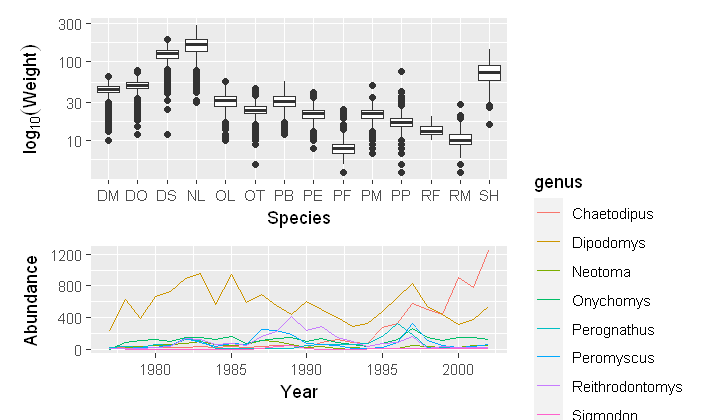

In [72]:
library(patchwork)

plot1 <- ggplot(data = surveys, aes(x = species_id, y = weight)) +
  geom_boxplot() +
  labs(x = "Species", y = expression(log[10](Weight))) +
  scale_y_log10()

plot2 <- ggplot(data = yearly_counts, aes(x = year, y = n, color = genus)) +
  geom_line() + 
  labs(x = "Year", y = "Abundance")

plot1 / plot2 + plot_layout(heights = c(3, 2))

You can also use parentheses () to create more complex layouts. There are many useful examples on the patchwork website

# Figure dimensions

Not the most exciting topic you might say but having control of the output size of your figures is a huge deal if you're trying to get published in a [tabloid journal](https://www.sciencemag.org), where  dimensions are **VERY SPECIFIC**:http://www.sciencemag.org/authors/instructions-preparing-initial-manuscript (BTW they even have specific $\LaTeX$ [instructions](http://www.sciencemag.org/authors/preparing-manuscripts-using-latex)). In any case, it matters.


<a href="figureanatomy1.png" target="_blank"><img src="figureanatomy1.png" width="400px"></a>

-----------------------

<a href="figureanatomy2.png" target="_blank"><img src="figureanatomy2.png" width="400px"></a>

-----------------------


<table class="paramsTablea">
	<tr>
	  <th>Parameter</th><th>Value</th><th>Description</th>
	</tr>
	<tr>
	  <td class="Rc">din,fin,pin</td><td class="Rc">=c(width,height)</td><td>Dimensions (width and height) of the device, figure and plotting regions (in inches)</td>
	</tr>
	<tr>
	  <td class="Rc">fig</td><td class="Rc">=c(left,right,bottom,top)</td><td>Coordinates of the figure region within the device.  Coordinates expressed as a fraction of the device region.</td>
	</tr>
	<tr>
	  <td class="Rc">mai,mar</td><td class="Rc">=c(bottom,left,top,right)</td><td>Size of each of the four figure margins in inches and lines of text (relative to current font size).</td>
	</tr>
	<tr>
	  <td class="Rc">mfg</td><td class="Rc">=c(row,column)</td><td>Position of the currently active figure within a grid of figures defined by either mfcol or mfrow.</td>
	</tr>
	<tr>
	  <td class="Rc">mfcol,mfrow</td><td class="Rc">=c(rows,columns)</td><td>Number of rows and columns in a multi-figure grid.</td>
	</tr>
	<tr>
	  <td class="Rc">new</td><td class="Rc">=TRUE or =FALSE</td><td>Indicates whether to treat the current figure region as a new frame (and thus begin a new plot over the top of the previous plot (TRUE) or to allow a new high level plotting function to clear the figure region first (FALSE).</td>
	</tr>
	<tr>
	  <td class="Rc">oma,omd,omi</td><td class="Rc">=c(bottom,left,top,right)</td><td>Size of each of the four outer margins in lines of text (relative to current font size), inches and as a fraction of the device region dimensions</td>
	</tr>
	<tr>
	  <td class="Rc">plt</td><td class="Rc">=c(left,right,bottom,top)</td><td>Coordinates of the plotting region expressed as a fraction of the device region.</td>
	</tr>
	<tr>
	  <td class="Rc">pty</td><td class="Rc">="s" or "m"</td><td>Type of plotting region within the figure region.  Is the plotting region a square (="s") or is it maximized (="m") to fit within the shape of the figure region.</td>
	</tr>
	<tr>
	  <td class="Rc">usr</td><td class="Rc">=c(left,right,bottom,top)</td><td>Coordinates of the plotting region corresponding to the axes limits of the plot.</td>
	</tr>
  </table>

**NB** `par()` is the function you need to use the parameters above.

From this table and the figures above you can see which dimensions affect which attributes of figure output, with particular emphasis on the fact that there are options for output in inches and output in relative dimensions. If you're exporting a file for publication, USE INCHES. The reason is illustrated here: 

Relative dimensions
<img src="Picture1.png" alt="Drawing" style="width: 600px;"/>

--------------

Inches
<img src="Picture2.png" alt="Drawing" style="width: 600px;"/>


These two figures have the same data, with the same point sizes but the one on top is relative while the one below is in inches. Note that markers in the zoomed panels in the upper figure were resized and look too small in the final product.  Deep stuff, but a major deal if you're publishing a paper with one common legend. 


# Exporting plots

R has several default export options, depending on what kind of file you'd like to create:

* jpeg() - a standard raster graphic
* pdf() - a standard vector graphic

After creating your plot, you can save it to a file in your favorite format. The Export tab in the Plot pane in RStudio will save your plots at low resolution, which will not be accepted by many journals and will not scale well for posters. The ggplot2 extensions website provides a list of packages that extend the capabilities of ggplot2, including additional themes.

Instead, use the ggsave() function, which allows you easily change the dimension and resolution of your plot by adjusting the appropriate arguments (width, height and dpi).

Below is the code to make a plot (note that we saved the plot to `my_plot` variable).

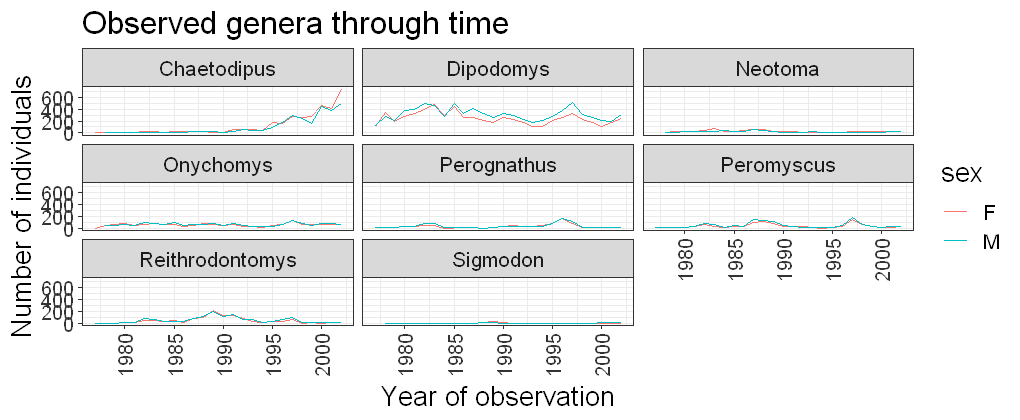

In [161]:
my_plot <- ggplot(data = yearly_sex_counts, 
                  aes(x = year, y = n, color = sex)) +
    geom_line() +
    facet_wrap(vars(genus)) +
    labs(title = "Observed genera through time",
        x = "Year of observation",
        y = "Number of individuals") +
    theme_bw() +
    theme(axis.text.x = element_text(colour = "grey20", size = 12, angle = 90,
                                     hjust = 0.5, vjust = 0.5),
          axis.text.y = element_text(colour = "grey20", size = 12),
          text = element_text(size = 16))

my_plot

Now lets save the `my_plot` plot:

In [159]:
ggsave("name_of_file.png", my_plot, width = 10, height = 7, dpi=700)

Here is the saved result, with different size and resolution than the version that gets rendered in RStudio plot panel:

<a href="name_of_file.png" target="_blank"><img src="name_of_file.png" width="600px"></a>


Note: The parameters width and height also determine the font size in the saved plot.

<div class="Q"><br>
    
1) Pick any of the plot examples above.
    
2) Re-draw the plot with some minor changes (e.g. different line width or color or transparency)
    
3) Make the plots title to be "Final plot made by My_Name", where you replace "My_Name" with your own name
    
4) Use the <b>ggsave()</b> function to save your plot at high resolution (dpi=700), and upload the image to this Brightspace question
    
5) Copy-paste code: "Copy" the code you used to make the plot, "paste" code to this Brightspace question

<span class="codeerror">Use: "Written Response" question<br>
    Make sure to "Enable inserted images and attachments"<br>
    

<br><br><div class="qhelp"></div></div>

<div class="big_title">This is the end of lab</div>

*******************
*******************

Code below is for formatting of this lab. Do not alter!

In [1]:
cssFile <- '../css/custom.css'
IRdisplay::display_html(readChar(cssFile, file.info(cssFile)$size))

IRdisplay::display_html("<style>body {counter-reset: question_num;}.Q::before {counter-increment: question_num;
    content: 'QUESTION ' counter(question_num) '\\A'; white-space: pre; }</style>")